# Projeto Eletromag - Ligando um Arduino Uno sem fio
### Camila Junqueira, João Vitor Oliveira, Lucca Nasser, Stephani Ferreira

In [1]:
# Imports
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## Sumário

1. Introdução ao projeto
1. Objetivos
1. Teoria: Elaboração do diagrama do modelo eletrodinâmico do circuito WPT 
1. Simulação: Código do modelo eletrodinâmico em Python

   4.1. Parâmetros

   4.2. Função para calcular correntes

   4.3. Escolha da frequência de operação, capacitores e indutâncias (Gráfico $V_2$ x $f$)

5. Cálculo: Definição do diâmetro, número de voltas e bitola do fio para a construção das bobinas
6. Experimental: Montagem das bobinas primária e secundária
7. Simulação: Atualização dos parâmetros da simulação da atividade (2)
8. Simulação:  Determinação da tensão na carga e da potência transmitida
9. Experimental: Montagem de seu protótipo
10. Conclusão



## 1) Introdução ao projeto

No século XIX, foi descoberta a transmissão de energia elétrica através do ar (ou seja, não há um fio que contecta componentes) devido as relações entre a corrente elétrica e o campo magnético. Isso é possível quando uma bobina é percorrida por uma corrente elétrica alternada, pois uma força eletromotriz induzida é gerada na segunda bobina quando as duas são posicionadas proximamente. Dessa maneira, tecnologias voltadas para a geração de energia elétrica alternada foi possível. Houve também a descoberta do acoplamento ressonante, que permite o aumento da intesidade do campo magnético para permitir uma transmissão mais eficiente de energia com maiores distâncias.


Para realizar um projeto capaz de concretizar a geração de energia dada pela indução de força eletromotriz com bobinas de acoplamento ressonante, o trabalho atual visa a ligação de um Arduino Uno sem fio, apenas utilizando o campo magnético. Além disso, a medição feita pelo Arduino Uno da tensão induzida gerada pelas relações entre as bobinas deve aparecer em um display conectado ao Arduino.


## 2) Objetivos

Para concretizar o projeto, foi preciso passar pelas etapas de idealização do circuito, simulá-lo computacionalmente, construí-lo fisicamente, iterar o projeto e mostrar que as simulações estão de acordo com a realizade experimental obtida.

## 3) Teoria: Elaboração do diagrama do modelo eletrodinâmico do circuito WPT 

Abaixo, está representado uma esquemática do circuito WPT. É sabido que o valor da indutância mútua (M) é dada pela expressão
 `M = k * sqrt(L1 * L2)`, sendo 'k' o fator de acoplamento das bobinas:

![circuito.png](attachment:circuito.png) #adicionar a imagem

Abaixo, o Esquema RC está representado. Ele é a parte induzida do circuito, onde o Arduino Uno (que deverá ser ligado pela força eletromotriz induzida e medirá esta tensão devido um divisor de tensão feita com resistores) e o display (onde aparecerá a tensão lida pelo Arduino) estão conctados.

![image.png](attachment:image.png) #adicionar a imagem

## 4) Simulação: Código do modelo eletrodinâmico em Python

### Parâmetros

In [2]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1 # 1 é um valor genérico, o ideal será determinado em 4
L2 = 1 # 1 é um valor genérico, o ideal será determinado em 4

# Capacitâncias
C1 = 1 # 1 é um valor genérico, o ideal será determinado em 4
C2 = 1 # 1 é um valor genérico, o ideal será determinado em 4

# Frequência
freq = 1 # 1 é um valor genérico, o ideal será determinado em 4

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

### Função para calcular as correntes

In [3]:
def CalculaLeonardo(Uf, Rc, XM):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

### Escolha da frequência de operação, capacitores e indutâncias 

#### Gráfico $V_2$ x $f$

In [4]:
#Parâmetros para a simulação

#Valores fixos de tensão de entrada, resistências e k
Uf = 10 
Rc = 102
Rdc = 0.5
k = 0.1

# Lista de valores para a análise
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(1*10**-10,100*10**3,1)

#Listas de valores necessários para analisar
V2_list = []
L_list = []
f_list = []
indices = []
v2_corr = []

indices: [34, 35, 36, 37, 38, 39, 40, 13755, 13756, 13757, 13758, 13759, 13760, 13761, 13762, 13763, 13764, 13765, 13766, 13767, 13768, 13769, 13770, 13771, 13772, 13773, 13774, 13775, 13776, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13788, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13796, 13797, 13798, 13799, 13800, 13801, 13802, 13803, 13804, 13805, 13806, 13807, 13808, 13809, 13810, 13811, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13819, 13820, 13821, 13822, 13823, 13824, 13825, 13826, 13827, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13835, 13836, 13837, 13838, 13839, 13840, 13841, 13842, 13843, 13844, 13845, 13846, 13847, 13848, 13849, 13850, 13851, 13852, 13853, 13854, 13855, 13856, 13857, 13858, 13859, 13860, 13861, 13862, 13863, 13864, 13865, 13866, 13867, 13868, 13869, 13870, 13871, 13872, 13873, 13874, 13875, 13876, 13877, 13878, 13879, 13880, 13881, 13882, 13883, 13884, 13885, 13886, 13887, 13888, 13889, 13890, 13891, 138

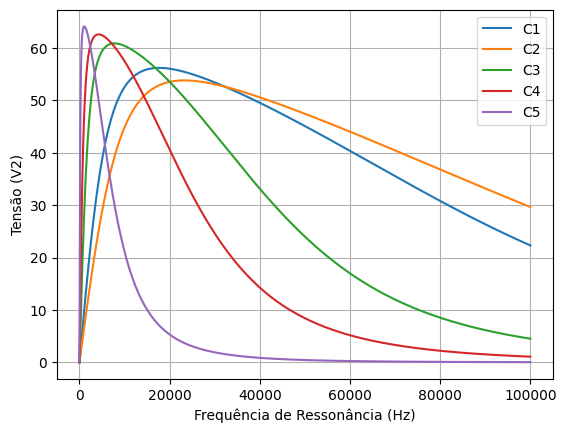

In [5]:
n = 0
for C in capacitores:
    V2_list = []
    L_list = []
    f_list = []
    indices = []
    v2_corr = []

    n = n + 1
    for f in frequencias:
        
        f_list.append(f)

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        L_list.append(L)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc, XM)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        
        V2_list.append(abs(V2))
    
    for j, valor in enumerate(V2_list):
        if 10 <= valor <= 12:
            indices.append(j)
            v2_corr.append(valor)
    
    if n == 5:
        print(f'indices: {indices}')
        print(f'V2: {v2_corr}')
        print()
        print(f'Capacitor: C{n},\nÍndices: {indices}')
        for i in indices:
            print(f'Tensão: {V2_list[i]}')
            print(f'Indutância: {L_list[i]}')
            print(f'Frequência: {f_list[i]}')
            print()

    plt.plot(frequencias, V2_list, label="C" + str(n))
    plt.xlabel("Frequência de Ressonância (Hz)")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()
plt.show()

Legenda:
1. Sabemos que para o funcionamento do arduino, precisa-se de 7 a 12V. Para isso, o código analisou as tensões entre 10 a 12 volts, pois 7-9V são entradas muito baixas, para garantir melhor funcionamento do projeto. No caso do código acima, foi analisado `Uf = 10V`.
1. No circuito WPT, tem-se uma resistência RC. O valor considerado dela foi de `RC = `. Pois,
1. Há, também, um fator de acoplamento `k` capaz de interferir na indutância mútua entre bobinas. Este valor foi considerado `k=`, que representa a distância entre elas.

Nas análises de tensãos entre 10 a 12V, o Capacitor `C5 = 4,7µF` foi escolhido, pois ele era o único que funcionava nas tensões que queríamos na frequência ideal `f = 13,7 KHz ` . Devido às limitações dos componentes eletrônicos do projeto, a frequência de operação é limitada. Dessa maneira, frequências muito altas não são boas para o funcionamento do projeto.

Com isso, foi obtido uma indutância de `L= 30mH` de acordo com os prints feitos pelo código de acordo com a restrição de tensão, de capacitância e frequência.

## 5) Cálculo: Definição do diâmetro, número de voltas e bitola do fio para a construção das bobinas

No item anterior, foi obtida um valor de indutância de `L= 30mH` para ambas as bobinas. 
Para realizar a montagem física das bobinas, foi preciso definir o diâmetro, o número de voltas e o tamanho da bitola do fio. 
Utilizando o site ' ', foi possível realizar estes cálculos. De acordo com ele, é preciso que a bobina siga as seguintes normas:

Dessa maneira:

diâmetro =

número de voltas = 

tamanho da bitola = 

## 6) Experimental: Montagem das bobinas primária e secundária

Para a montagem do circuito, foi utilizado:

FOTO

## 7) Simulação: Atualização dos parâmetros da simulação da atividade (2)

Com a aquisição dos parâmetros reais medidos das bobinas e dos capacitores, o modelo construído em (2) foi atualizado. 
Como vamos utilizar uma tensão quadrada na entrada da bobina primária no experimento, é necessário realizar alterações no modelo anterior. A amplitude da função deverpa ser senoidal na simulação. Para isso, utilizaremos:

𝑽𝟏(𝒕) = (𝟐/𝝅) * 𝑽𝒑 𝒄𝒐𝒔(𝝎𝒕) 

Sendo 𝑉𝑝 a amplitude da onda quadrada.

In [6]:
#Valores atualizados para as próximas simulações
Uf = (2/pi)*19 #onda quadrada

C = 4.7*10**-6
f = 13700
k = 0.1
Rdc = 0.5 

A amplitude da onda quadrada é feita pela 'alimentação dos MOSFETs'. 

## 8) Simulação:  Determinação da tensão na carga e da potência transmitida

Com tudo determinado, é possível calcular a potência consumida pela carga segundo as necessidades da aplicação. Para isso, vamos analisar como o coeficiente de acoplamento `k` infuluencia juntamente com o `Rc` na tensão obtida e, consequentemente, na potência obtida. 
Assim, será possível confrontar a especificação de distância entre bobinas em seu projeto e a tensão/potência na carga. 

In [7]:
#Valores de carga e de fator de acoplamento que serão utilizados para analisar a potência do circuito
Rc_list_1 = np.arange(11, 300, 25)
k_list = np.arange(0,1.1,0.01)

#Valores que serão necessários para o item 8
Max_k = []
Max_kP = []
Max__v = []
Max__vP = []

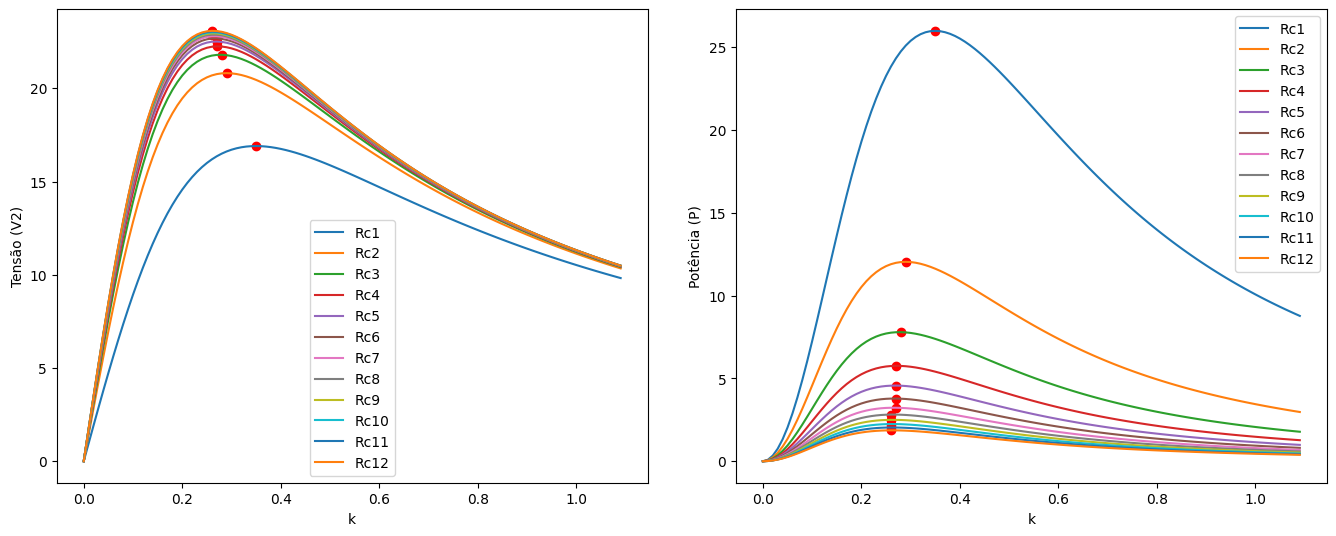

In [8]:
n=0

plt.figure(figsize=(14, 6))
for Rc in Rc_list_1:
    ks_max = []
    vs_max = []
    vsp_max = []
    ksp_max = []

    Vcarga_list = []
    P_list = []

    V_max = 0  
    k_max = 0   
    P_max = 0

    n+=1
    for k in k_list:
        C1 = C2 = C
        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc, XM)
        V2 = ((Rc*XC)/(Rc+XC))*i2
        Vcarga_list.append(abs(V2))
        P = ((V2)**2)/Rc
        P_list.append(abs(P))
        
        if abs(V2) > V_max:
            V_max = abs(V2)
            k_max = k
            vs_max.append(abs(V2))
            ks_max.append(k)
        if abs(P) > P_max:
            P_max = abs(P)
            k_max_P = k
            vsp_max.append(abs(P))
            ksp_max.append(k)
    
    Max__v.append(max(vs_max))
    Max_k.append(max(ks_max))
    Max_kP.append(max(ksp_max))  
    Max__vP.append(max(vsp_max))

    plt.subplot(1, 2, 1)  
    plt.plot(k_list, Vcarga_list, label="Rc" + str(n))
    plt.scatter(k_max, V_max, color='red')
    plt.xlabel("k")
    plt.ylabel("Tensão (V2)")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)  
    plt.plot(k_list, P_list, label="Rc" + str(n))
    plt.scatter(k_max_P, P_max, color='red')
    plt.xlabel("k")
    plt.ylabel("Potência (P)")
    plt.legend()
    plt.grid()

plt.tight_layout(pad=3.0)  
plt.show()


Com ambos os gráficos obtidos, 

## 9) Experimental: Montagem de seu protótipo

Protótipo final

## 10) Conclusão

É importante também calcular a eficiência da transmissão. 